In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Reading Data

In [3]:
df = pd.read_csv("your_data.csv")

Univariate Data Analysis

Target (Smoking) Disribution

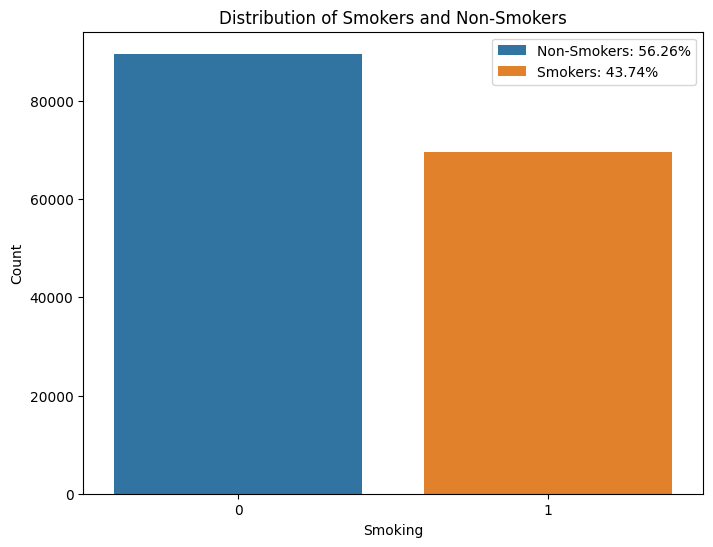

In [68]:
target = df[["smoking"]]
num_samples = len(df)
smokers_count = len(df[df["smoking"] == 1])
nonsmokers_count = len(df[df["smoking"] == 0])
somkers_percentage = 100 * smokers_count/num_samples
nonsmokers_percentage = 100 * nonsmokers_count/num_samples
plt.figure(figsize=(8, 6))
sns.countplot(x="smoking", data=df, hue="smoking")
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Distribution of Smokers and Non-Smokers')
plt.legend(labels=[f'Non-Smokers: {round(nonsmokers_percentage,2)}%',  f"Smokers: {round(somkers_percentage,2)}%"])

plt.show()

Feature 1: hemoglobin

Hemoglobin:
Mean 14.797
Median 15.0
Max Value 21.0
Min Value 4.9
Range 16.1
Standard Deviation 1.431
Skew -0.634
IQR 2.0


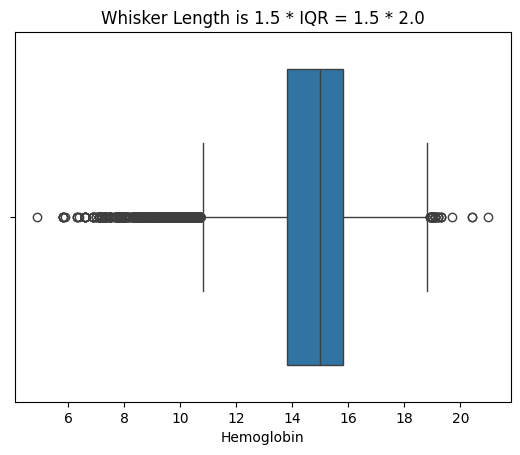

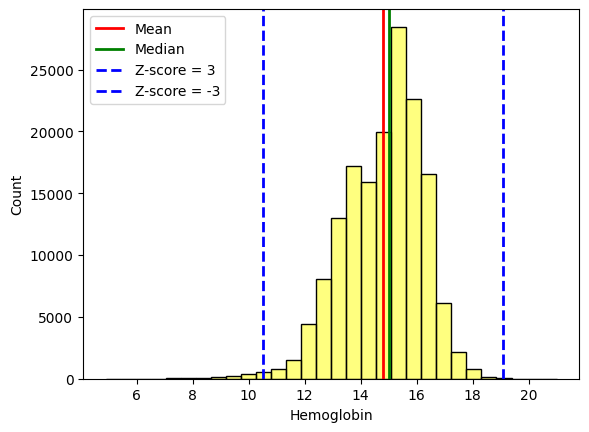

In [69]:
# Analyzing Hemoglobin Feature without information about the target
hemoglobin_feature = df["hemoglobin"]

# Central Tendency Measures
hemoglobin_mean = hemoglobin_feature.mean()
hemoglobin_median = hemoglobin_feature.median()

# Measures of Dispersion
hemoglobin_max_val = hemoglobin_feature.max()
hemoglobin_min_val = hemoglobin_feature.min()
hemoglobin_range = hemoglobin_max_val - hemoglobin_min_val
hemoglobin_std = hemoglobin_feature.std()
hemoglobin_skew = hemoglobin_feature.skew()
hemoglobin_iqr = hemoglobin_feature.quantile(0.75) - hemoglobin_feature.quantile(0.25)
z_score_positive3 = 3 * hemoglobin_std + hemoglobin_mean
z_score_negative3 = -3 * hemoglobin_std + hemoglobin_mean

print("Hemoglobin:")
print(f"Mean {round(hemoglobin_mean, 3)}")
print(f"Median {round(hemoglobin_median, 3)}")
print(f"Max Value {round(hemoglobin_max_val, 3)}")
print(f"Min Value {round(hemoglobin_min_val, 3)}")
print(f"Range {round(hemoglobin_range, 3)}")
print(f"Standard Deviation {round(hemoglobin_std, 3)}")
print(f"Skew {round(hemoglobin_skew, 3)}")
print(f"IQR {round(hemoglobin_iqr, 3)}")


# Box Plot for Hemoglobin Feature
sns.boxplot(x=hemoglobin_feature)
plt.xlabel('Hemoglobin')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hemoglobin_iqr, 3)}")
plt.show()

# Histogram for Hemoglobin Feature
sns.histplot(hemoglobin_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hemoglobin')
plt.ylabel('Count')
plt.axvline(hemoglobin_mean, c='red', ls='-', lw=2)
plt.axvline(hemoglobin_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

In [21]:
print("hearing(right) unique values:", df['hearing(right)'].unique())
print("dental caries unique values:", df['dental caries'].unique())

hearing(right) unique values: [1 2]
dental caries unique values: [0 1]


# **Feature 2** : Hearing

Hearing:
Mean 1.023
Median 1.0
Max Value 2
Min Value 1
Range 1
Standard Deviation 0.151
Skew 6.302
IQR 0.0


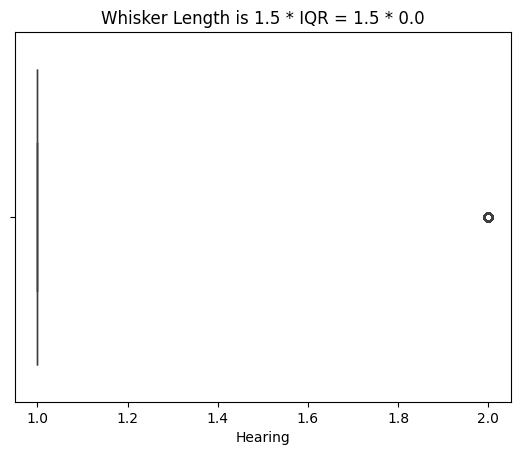

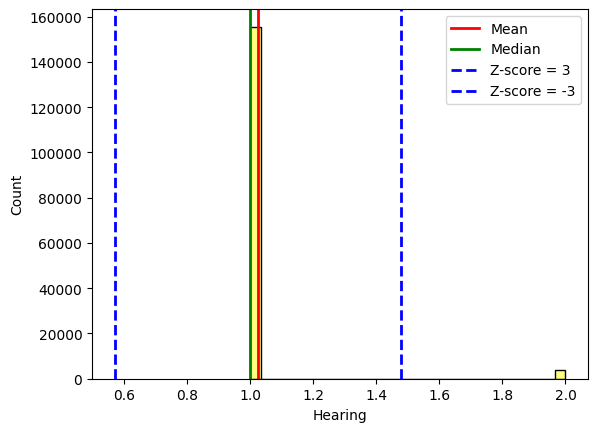

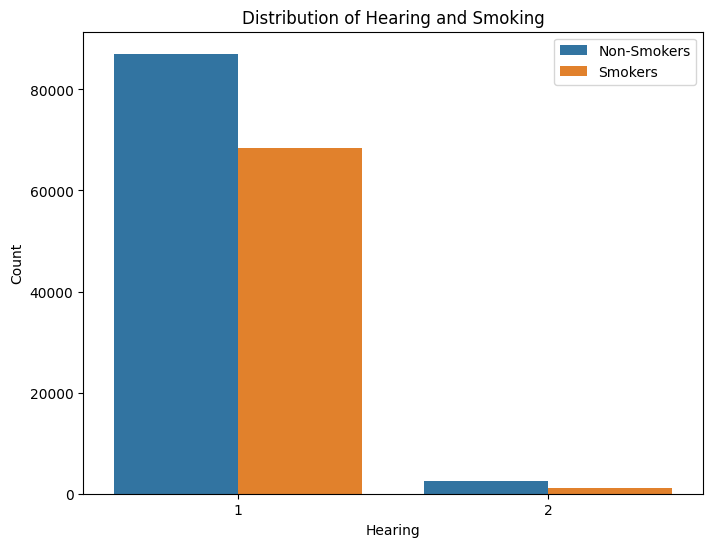

In [5]:
hearing_feature = df['hearing(right)']
label = df["smoking"]

# Central Tendency Measures
hearing_mean = hearing_feature.mean()
hearing_median = hearing_feature.median()

# Measures of Dispersion
hearing_max_val = hearing_feature.max()
hearing_min_val = hearing_feature.min()
hearing_range = hearing_max_val - hearing_min_val
hearing_std = hearing_feature.std()
hearing_skew = hearing_feature.skew()
hearing_iqr = hearing_feature.quantile(0.75) - hearing_feature.quantile(0.25)
z_score_positive3 = 3 * hearing_std + hearing_mean
z_score_negative3 = -3 * hearing_std + hearing_mean

print("Hearing:")
print(f"Mean {round(hearing_mean, 3)}")
print(f"Median {round(hearing_median, 3)}")
print(f"Max Value {round(hearing_max_val, 3)}")
print(f"Min Value {round(hearing_min_val, 3)}")
print(f"Range {round(hearing_range, 3)}")
print(f"Standard Deviation {round(hearing_std, 3)}")
print(f"Skew {round(hearing_skew, 3)}")
print(f"IQR {round(hearing_iqr, 3)}")

# Box Plot for Hearing Feature
sns.boxplot(x=hearing_feature)
plt.xlabel('Hearing')
plt.title(f"Whisker Length is 1.5 * IQR = 1.5 * {round(hearing_iqr, 3)}")
plt.show()

# Histogram for Hearing Feature
sns.histplot(hearing_feature, bins=30, alpha=0.5, color="yellow")
plt.xlabel('Hearing')
plt.ylabel('Count')
plt.axvline(hearing_mean, c='red', ls='-', lw=2)
plt.axvline(hearing_median, c='green', ls='-', lw=2)
plt.axvline(z_score_positive3, c='blue', ls='--', lw=2)
plt.axvline(z_score_negative3, c='blue', ls='--', lw=2)

plt.legend(labels=['Mean', 'Median', "Z-score = 3", "Z-score = -3"])
plt.show()

# Hearing Feature with respect to the target
plt.figure(figsize=(8, 6))
sns.countplot(x="hearing(right)", data=df, hue="smoking")
plt.xlabel('Hearing')
plt.ylabel('Count')
plt.title('Distribution of Hearing and Smoking')
plt.legend(labels=["Non-Smokers", "Smokers"])
plt.show()
